## Step 1: Get Top Songs by Artist

**API Endpoint:** Last.fm `artist.getTopTracks`

**Base URL:** `http://ws.audioscrobbler.com/2.0/`

**Parameters:** `artist`, `api_key`, `format`, `limit`

In [19]:
from dotenv import load_dotenv
import os
import requests

load_dotenv()
api_key = os.getenv('LASTFM_API_KEY')

params = {
    'method': 'artist.getTopTracks',
    'artist': 'Taylor Swift',
    'api_key': api_key,
    'format': 'json',
    'limit': 10
}

response = requests.get('http://ws.audioscrobbler.com/2.0/', params=params)

if response.status_code == 200:
    data = response.json()
    if 'toptracks' in data:
        print(f"Top 10 songs by '{params['artist']}':\n")
        for i, track in enumerate(data['toptracks']['track'], 1):
            print(f"{i}. {track['name']} - {int(track['playcount']):,} plays")


Top 10 songs by 'Taylor Swift':

1. Blank Space - 27,339,537 plays
2. Cruel Summer - 48,102,479 plays
3. Shake It Off - 18,383,543 plays
4. Style - 32,483,035 plays
5. cardigan - 43,840,789 plays
6. Love Story - 14,104,198 plays
7. You Belong with Me - 13,375,924 plays
8. august - 41,945,600 plays
9. Anti-Hero - 33,926,794 plays
10. Lover - 26,912,247 plays


## Step 2: Sort and Display Top 3 Most Popular Songs

This section demonstrates how to:
- Sort the retrieved tracks by playcount (popularity)
- Extract and display only the top 3 most popular songs

In [20]:
import pandas as pd

if 'data' in locals() and 'toptracks' in data:
    df = pd.DataFrame(data['toptracks']['track'])[['name', 'playcount']]
    df['playcount'] = pd.to_numeric(df['playcount'], errors='coerce').astype(int)
    top3 = df.sort_values('playcount', ascending=False).head(3)
    
    print("Top 3 most popular songs:\n")
    for i, (_, row) in enumerate(top3.iterrows(), 1):
        print(f"{i}. {row['name']} - {row['playcount']:,} plays")


Top 3 most popular songs:

1. Cruel Summer - 48,102,479 plays
2. cardigan - 43,840,789 plays
3. august - 41,945,600 plays


## Step 3: Get Top Tags for Each Track

This section demonstrates how to:
- Fetch top tags/genres for each track using the `track.getTopTags` API method
- Create a reusable function to retrieve tags for any track
- Add a new column to the DataFrame containing the top 5 tags for each song

In [ ]:
import requests
import pandas as pd

def get_top_tags(artist, track_name, max_tags=5):
    response = requests.get('http://ws.audioscrobbler.com/2.0/', params={
        'method': 'track.getTopTags', 'artist': artist, 'track': track_name,
        'api_key': api_key, 'format': 'json'
    })
    tags = response.json().get('toptags', {}).get('tag', [])
    return [tag['name'] for tag in tags[:max_tags]] if response.status_code == 200 else []

if 'df' in locals():
    df['top_tags'] = [get_top_tags(params['artist'], name) for name in df['name']]
    print(df[['name', 'playcount', 'top_tags']].head())


           name  playcount                                           top_tags
0   Blank Space   27339537  [pop, love at first listen, 2014, female vocal...
1  Cruel Summer   48102479  [electropop, pop, synthpop, industrial pop, sy...
2  Shake It Off   18383543  [pop, 2014, haters gonna hate, taylor swift, l...
3         Style   32483035  [pop, synthpop, taylor swift, love at first li...
4      cardigan   43840789  [folk pop, folk, chamber pop, singer-songwrite...


#create a scatter plot


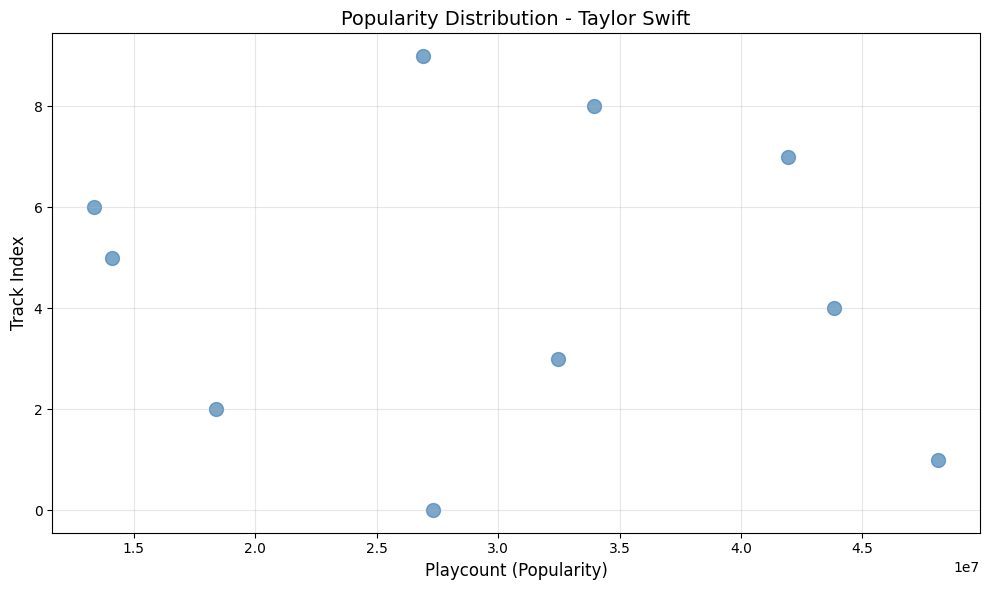

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['playcount'], range(len(df)), alpha=0.7, s=100, c='steelblue')
plt.xlabel('Playcount (Popularity)', fontsize=12)
plt.ylabel('Track Index', fontsize=12)
plt.title(f'Popularity Distribution - {params["artist"]}', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()